<a href="https://colab.research.google.com/github/SelmaDM/Signal_Treatement/blob/master/Manipulation%20de%20fichiers%20num%C3%A9riques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt

In [2]:
fs, signal = wav.read('diner.wav')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


16000
[ 0  0 -1 ...  0 -4 -6]


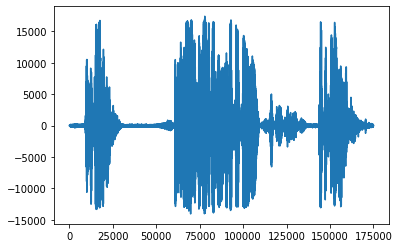

In [4]:
print(fs)
print(signal)
#type(signal)
plt.plot(signal)

In [5]:
print ('Data:', signal)
print ('Sampling rate:', fs)
#print ('Audio length:', signal.size/fs, 'seconds')
print ('Lowest amplitude:', min(signal))
print ('Highest amplitude:', max(signal))


Data: [ 0  0 -1 ...  0 -4 -6]
Sampling rate: 16000
Lowest amplitude: -14076
Highest amplitude: 17403


In [6]:
#Transformez les données d'entiers à réels flottants
signal = signal/2**15
print (signal)

[ 0.00000000e+00  0.00000000e+00 -3.05175781e-05 ...  0.00000000e+00
 -1.22070312e-04 -1.83105469e-04]


In [7]:
#calculer la durée du fichier 
len(signal)/fs

10.9453125

In [8]:
print(signal.shape[0])

175125


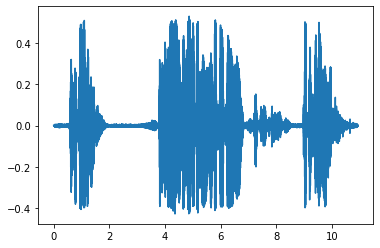

In [9]:
length = signal.shape[0]/fs
time = np.linspace(0., length, signal.shape[0])
plt.plot(time, signal[:])

In [10]:
# Affichez les 10 premières valeurs du signal qui sont différentes de 0
indices = np.nonzero(signal)[0][:10]
valeurs = signal[indices]
print("Indices des 10 premières valeurs différentes de 0 :", indices)
print("Valeurs correspondantes :", valeurs)

Indices des 10 premières valeurs différentes de 0 : [ 2  3 10 22 27 34 36 40 41 48]
Valeurs correspondantes : [-3.05175781e-05  3.05175781e-05 -3.05175781e-05  3.05175781e-05
 -3.05175781e-05 -3.05175781e-05  3.05175781e-05 -3.05175781e-05
  3.05175781e-05  3.05175781e-05]


In [11]:
# Affichez les 10 premières valeurs du signal qui sont différentes de 0

boolarr = signal[:]!= 0

In [12]:
# Affichez les 10 premières valeurs du signal qui sont différentes de 0

print(boolarr)

[False False  True ... False  True  True]


In [13]:
# Affichez les 10 premières valeurs du signal qui sont différentes de 0

ten = []
for i in signal[:100]:
    #print(i)
    if i!=0:
        #print(signal[i])
        #print(i)
        ten = np.append(ten,i)
print(ten)

[-3.05175781e-05  3.05175781e-05 -3.05175781e-05  3.05175781e-05
 -3.05175781e-05 -3.05175781e-05  3.05175781e-05 -3.05175781e-05
  3.05175781e-05  3.05175781e-05 -3.05175781e-05  3.05175781e-05
 -3.05175781e-05  3.05175781e-05 -3.05175781e-05  3.05175781e-05
  3.05175781e-05 -3.05175781e-05  3.05175781e-05 -3.05175781e-05
  3.05175781e-05]


In [14]:
img = plt.imread('photo.jpg')

In [15]:
taille = len(img)

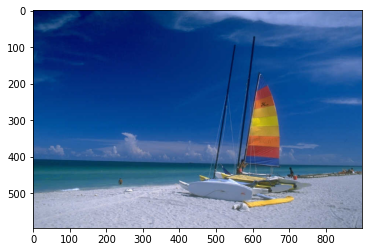

In [16]:
plt.imshow(img)

In [17]:
#afficher les intensités RGB du premier pixel de l'image
print(img[0][0])


[ 2 16 91]


In [18]:
#sous_quantifier


def quantize_audio(input_file, output_file, bits):
    # Charger le fichier audio
    rate, data = wav.read(input_file)

    # Normaliser les échantillons à la plage [-1, 1]
    data = data / (2.**(16-1))

    # Quantification des échantillons
    q = 2.**bits
    data = np.floor(data*q)/q

    # Mettre à l'échelle les échantillons de retour à leur plage d'origine
    data = data * (2.**(16-1))

    # Écrire le fichier audio quantifié
    wav.write(output_file, rate, data.astype(np.int16))


In [19]:
# Exemple d'utilisation de la fonction pour sous-quantifier un fichier audio avec différentes quantifications de bits
quantize_audio("diner.wav", "fichier_audio_12bits.wav", 12)
quantize_audio("diner.wav", "fichier_audio_8bits.wav", 8)
quantize_audio("diner.wav", "fichier_audio_4bits.wav", 4)
quantize_audio("diner.wav", "fichier_audio_2bits.wav", 2)



```
# Ce texte est au format code
La qualité du son résultant dépendra de plusieurs facteurs, tels que le niveau de quantification utilisé, la qualité du fichier audio original, la durée de l'enregistrement audio et la qualité de la conversion audio. En général, plus le niveau de quantification est faible, plus la qualité audio sera dégradée.

Dans notre exemple, nous avons utilisé des facteurs de sous-quantification correspondant à des niveaux de quantification de 12, 8, 4 et 2 bits. Le niveau de quantification affecte le nombre de niveaux de quantification disponibles pour représenter chaque échantillon audio. Plus le niveau de quantification est élevé, plus la résolution de l'échantillon sera élevée, ce qui permet de conserver plus d'informations dans le signal audio. Avec un niveau de quantification plus faible, le nombre de niveaux disponibles pour représenter chaque échantillon est réduit, ce qui peut entraîner une perte de qualité audio.

En conséquence, le son résultant sera probablement de qualité inférieure à l'enregistrement original, en particulier pour des niveaux de quantification plus faibles. Cependant, la qualité audio est subjective et peut varier en fonction des préférences de chaque auditeur.
```



In [20]:
#sous_échantillonage
signal_echa = signal[range(0,len(signal),2)]
#len(signal)/2
len(signal_echa)

87563

In [21]:
signal_echa = signal[range(0,len(signal),4)]
#len(signal)/4
len(signal_echa)

43782

In [22]:
signal_echa = signal[range(0,len(signal),8)]
#len(signal)/5
len(signal_echa)

21891

In [23]:
import numpy as np

def subsample_image(input_image, n):
    # Create a mask with the n most significant bits set to 1
    mask = (1 << n) - 1 << (8 - n)
    
    # Apply the mask to the input image to keep the n most significant bits and set the rest to 0
    subsampled_image = np.bitwise_and(input_image, mask)
    
    # Return the subsampled image
    return subsampled_image





```
# Ce texte est au format code
Cette fonction utilise la fonction numpy.bitwise_and pour appliquer un masque à l'image d'entrée qui conserve les n bits de poids fort et met à zéro les autres bits. Le masque est créé en définissant les n bits de poids fort à 1 et les autres à 0, puis en les décalant vers la gauche de (8 - n) bits pour les aligner avec les bits correspondants de l'image. Ensuite, la fonction numpy.bitwise_and applique le masque à l'image d'entrée pour ne conserver que les bits correspondant au masque. La fonction retourne ensuite l'image sous-échantillonnée.
```



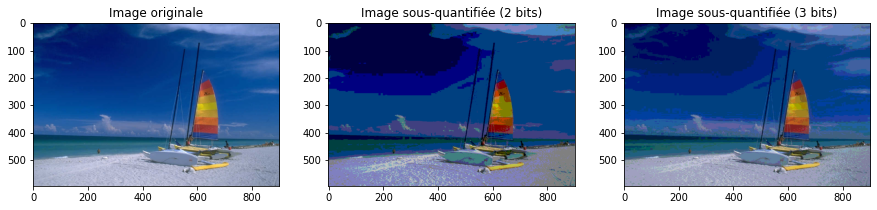

In [24]:
import matplotlib.pyplot as plt

# Charger l'image d'exemple
img = plt.imread('photo.jpg')

# Sous-quantifier l'image pour garder les 2 bits de poids fort
subsampled_img_2bits = subsample_image(img, 2)

# Sous-quantifier l'image pour garder les 3 bits de poids fort
subsampled_img_3bits = subsample_image(img, 3)

# Afficher l'image originale et les deux images sous-quantifiées
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
ax1.imshow(img)
ax1.set_title('Image originale')
ax2.imshow(subsampled_img_2bits)
ax2.set_title('Image sous-quantifiée (2 bits)')
ax3.imshow(subsampled_img_3bits)
ax3.set_title('Image sous-quantifiée (3 bits)')
plt.show()



```
# Ce texte est au format code

En général, plus le nombre de bits de poids fort conservé est faible, plus l'image sous-quantifiée sera dégradée. Cela est dû au fait que la sous-quantification consiste à réduire le nombre de niveaux de gris disponibles dans l'image, ce qui entraîne une perte d'informations et une dégradation de la qualité de l'image.

Dans notre exemple, l'image sous-quantifiée avec 2 bits a une qualité nettement inférieure à l'image originale ou à l'image sous-quantifiée avec 3 bits. L'image sous-quantifiée avec 3 bits est également légèrement dégradée par rapport à l'image originale, mais la différence de qualité est moins perceptible.

Cela souligne l'importance de choisir judicieusement le nombre de bits de poids fort à conserver lors de la sous-quantification d'une image, en fonction des exigences de qualité et de la quantité de données à stocker ou à transmettre.












```

